Kelompok 14 STARTERPACK Tugas 4 (22 September 2025)

Achmad Baharuddin Al Anshory
Aditya Winarto
Andi Sri Rezky Dian Batari
Elvira Dwi Anjani Link Dataset : [link dataset](https://docs.google.com/spreadsheets/d/1cD9GivqakBxwsQKtR5pz5kOGYQWoddgr/edit?usp=sharing&ouid=106957609319676578855&rtpof=true&sd=true)

Link tersebut adalah link dataset yang digunakan untuk analisis statistik deskriptif, analisis visualisasi, serta dokumentasi insight dan hipotesis. dataset tersebut adalah dataset yang sudah bersih

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sheet_id = '1cD9GivqakBxwsQKtR5pz5kOGYQWoddgr'
xlsx_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx'

In [ ]:
data = pd.read_excel(xlsx_url)
pd.DataFrame(data)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',10)
print(data)

    Order ID Restaurant Name         Location          Order Time  \
0     ORD001        Domino's     New York, NY 2024-01-05 18:30:00   
1     ORD002     Papa John's  Los Angeles, CA 2024-02-14 20:00:00   
2     ORD003  Little Caesars      Chicago, IL 2024-03-21 12:15:00   
3     ORD004       Pizza Hut        Miami, FL 2024-04-10 19:45:00   
4     ORD005   Marco's Pizza       Dallas, TX 2024-05-05 13:00:00   
..       ...             ...              ...                 ...   
695   ORD697       Pizza Hut      Atlanta, GA 2025-09-10 19:00:00   
696   ORD698     Papa John's        Omaha, NE 2025-09-11 20:15:00   
697   ORD699  Little Caesars   Louisville, KY 2025-09-12 19:30:00   
698   ORD700   Marco's Pizza    Milwaukee, WI 2025-09-13 18:45:00   
699   ORD701        Domino's  Albuquerque, NM 2025-09-14 20:00:00   

          Delivery Time  Delivery Duration (min) Pizza Size    Pizza Type  \
0   2024-01-05 18:45:00                       20     Medium           Veg   
1   2024-02-14 20

Insight (Pie chart):
Mayoritas pelanggan memilih metode pembayaran online dibanding offline.

Grafik yang digunakan: Pie chart (paling tepat untuk proporsi kategori).

Visualisasi (kode ringkas & bersih):

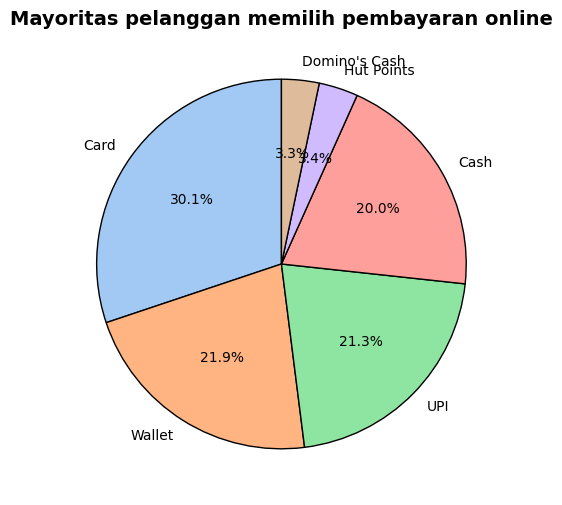

In [ ]:
payment_counts = data['Payment Method'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("pastel"), wedgeprops={'edgecolor':'black'})
plt.title("Mayoritas pelanggan memilih pembayaran online", fontsize=14, weight='bold')
plt.show()

# Pertanyaan: **Jika saya tunjukan inike skateholder tujuan,keputusan apa yang dia ambil??**

# Keputusan: ***Karena lebih dari 70% pelanggan memilih metode pembayaran online, stakeholder dapat memperkuat strategi digital-first dengan meningkatkan promosi dan fasilitas pembayaran digital. Keputusan ini bisa berupa memperluas opsi e-wallet, memperkuat kerja sama dengan penyedia fintech, atau memberikan insentif khusus pada pelanggan yang menggunakan pembayaran online. Namun, dengan tetap mempertahankan opsi offline (sekitar 26% pelanggan), perusahaan bisa menjaga inklusivitas bagi pelanggan yang belum terbiasa atau belum memiliki akses ke layanan digital.***

/tmp/ipython-input-2004638887.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


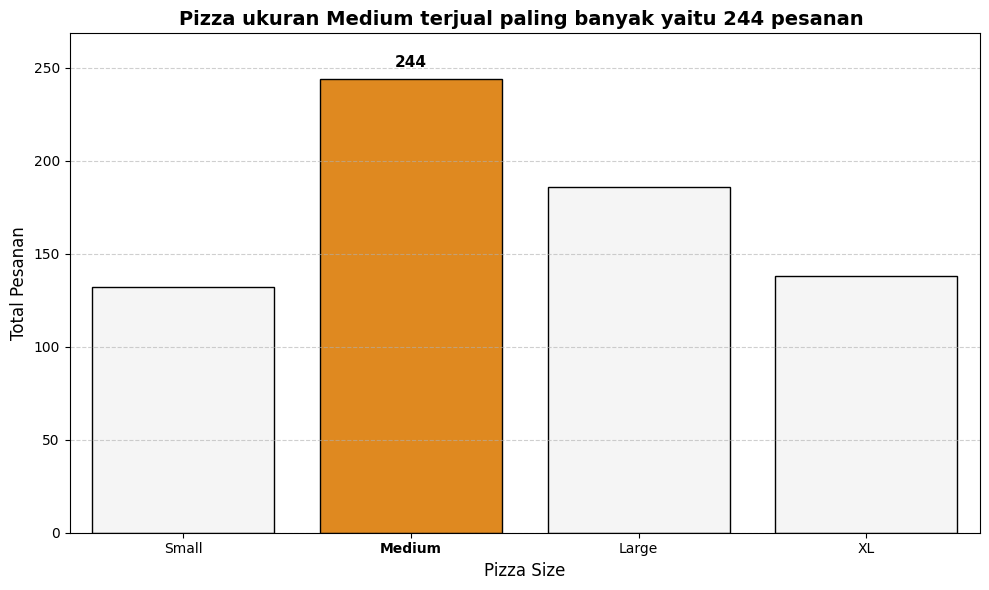

In [ ]:
CUSTOM_BOLD_CATEGORIES = ['Medium']
# ---

# 1. Hitung Jumlah Pesanan
pizza_counts_raw = data['Pizza Size'].value_counts()

# 2. Definisikan Urutan Ordinal
pizza_size_order = ['Small', 'Medium', 'Large', 'XL']

# 3. URUTKAN KATEGORI (Reindex)
pizza_counts_ordered = pizza_counts_raw.reindex(pizza_size_order, fill_value=0)

# 4. Identifikasi Ukuran Pizza yang Paling Dominan untuk Highlight
dominant_size = pizza_counts_raw.idxmax()

# 5. Definisikan Palet Warna Kustom
highlight_color = '#FF8C00'
neutral_color = '#F5F5F5'

color_list = [highlight_color if size == dominant_size else neutral_color
              for size in pizza_counts_ordered.index]

# 6. Buat Visualisasi Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=pizza_counts_ordered.index,
    y=pizza_counts_ordered.values,
    palette=color_list,
    edgecolor='black',
    linewidth=1,
)

# 7. Tambahkan Label Data (Angka di Atas Batang) - DIBUAT BOLD KUSTOM
for i, count in enumerate(pizza_counts_ordered.values):
    category = pizza_counts_ordered.index[i]

    # === PERBAIKAN UTAMA: HANYA TAMPILKAN ANGKA JIKA KATEGORI ADA DI LIST KUSTOM ===
    if category in CUSTOM_BOLD_CATEGORIES:

        # Menghitung padding berdasarkan max count
        max_count_val = pizza_counts_ordered.max()
        padding = max_count_val * 0.02

        ax.text(i, count + padding, str(count),
                ha='center',
                va='bottom',
                fontsize=11,
                weight='bold') # <-- Aplikasikan BOLD PADA ANGKA YANG DITAMPILKAN

# 8. Atur Kustomisasi BOLD pada Label Kategori Sumbu X
plt.title(
    "Pizza ukuran Medium terjual paling banyak yaitu 244 pesanan ",
    fontsize=14,
    weight='bold'
)

plt.xlabel('Pizza Size', fontsize=12)
plt.ylabel('Total Pesanan', fontsize=12)

# Loop untuk mengatur BOLD pada kategori tertentu di Sumbu X
for label in ax.get_xticklabels():
    if label.get_text() in CUSTOM_BOLD_CATEGORIES:
        label.set_weight('bold') # <-- Aplikasikan BOLD PADA KATEGORI

plt.ylim(0, pizza_counts_ordered.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-101976953.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


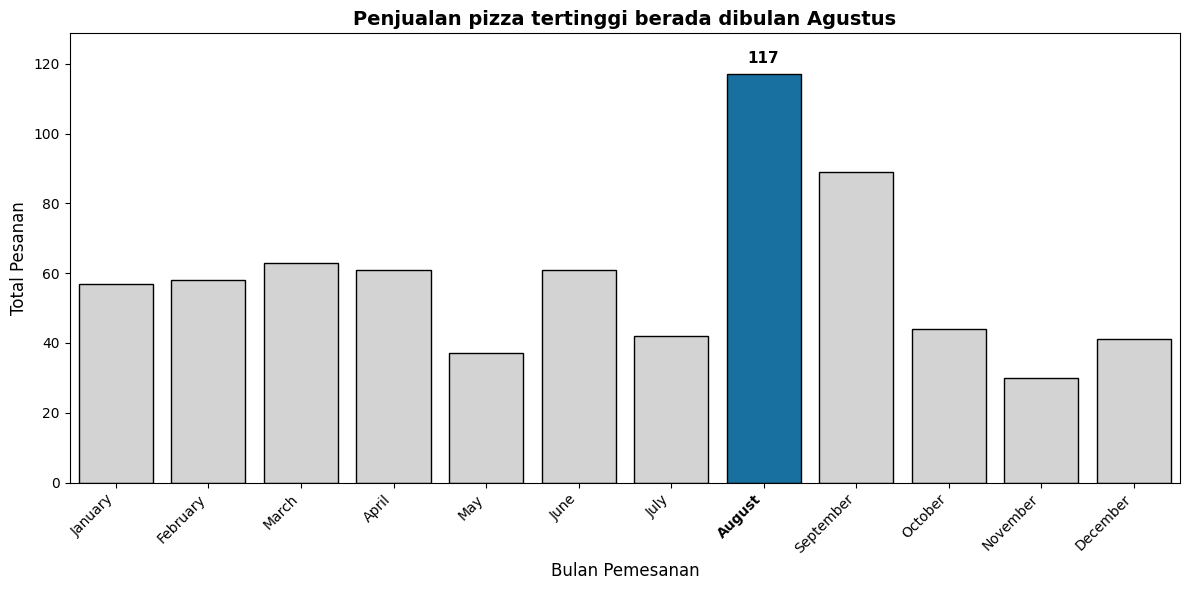

In [ ]:
CUSTOM_BOLD_CATEGORIES = ['August']
# ---

# 1. Hitung Jumlah Pesanan (Count)
counts_raw = data['Order Month'].value_counts()

# 2. Definisikan Urutan Ordinal Bulan
order_month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# 3. URUTKAN KATEGORI (Reindex)
# Mengurutkan count berdasarkan urutan kronologis
counts_ordered = counts_raw.reindex(order_month_list, fill_value=0)

# 4. Identifikasi Bulan Paling Dominan (Peak) untuk Warna Sorotan
dominant_size = counts_raw.idxmax()

# 5. Definisikan Palet Warna Kustom
highlight_color = '#0077B6'  # Biru Gelap untuk Peak Month
neutral_color = '#D3D3D3'   # Abu-abu Muda untuk sisanya

color_list = [highlight_color if month == dominant_size else neutral_color
              for month in counts_ordered.index]

# 6. Buat Visualisasi Bar Chart
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=counts_ordered.index, # Menggunakan urutan Bulan
    y=counts_ordered.values, # Menggunakan nilai Bulan
    palette=color_list,
    edgecolor='black',
    linewidth=1,
)

# 7. Tambahkan Label Data (Angka di Atas Batang) - DIBUAT BOLD KUSTOM
for i, count in enumerate(counts_ordered.values):
    category = counts_ordered.index[i]

    # HANYA TAMPILKAN ANGKA JIKA KATEGORI ADA DI LIST KUSTOM ('August', 'November')
    if category in CUSTOM_BOLD_CATEGORIES:

        # Menghitung padding
        max_count_val = counts_ordered.max()
        padding = max_count_val * 0.02

        ax.text(i, count + padding, str(count),
                ha='center',
                va='bottom',
                fontsize=11,
                weight='bold') # Angka Penjualan di-BOLD

# 8. Atur Kustomisasi BOLD pada Label Kategori Sumbu X
plt.title(
    "Penjualan pizza tertinggi berada dibulan Agustus",
    fontsize=14,
    weight='bold' # Judul Tebal
)

plt.xlabel('Bulan Pemesanan', fontsize=12)
plt.ylabel('Total Pesanan', fontsize=12)

# Loop untuk mengatur BOLD pada kategori tertentu di Sumbu X
for label in ax.get_xticklabels():
    if label.get_text() in CUSTOM_BOLD_CATEGORIES:
        label.set_weight('bold') # Kategori Bulan di-BOLD

plt.xticks(rotation=45, ha='right') # Putar label bulan agar tidak tumpang tindih
plt.ylim(0, counts_ordered.max() * 1.1)
plt.tight_layout()
plt.show()